# Introduction
Lors d'une expérience, des données sont accumulées qui caractérisent le comportement d'un système. En général, un modèle existe pour rationaliser ces données. Ce modèle, sous forme de loi mathématique permet de rendre compte au mieux des valeurs obtenues.

Par exemple, dans le cadre d'un ressort, la loi de Hooke nous dit que l'allongement du ressort est proportionnel à la force exercée sur le ressort :

`F = k Δl`

où `k` est la raideur du ressort et `Δl = l - l0`, `l` étant la longueur mesurée et `l0` étant la longueur du ressort à vide.

Ainsi, si on connait `Δl` en fonction de `F`, on peut déterminer `k` en ajustant au mieux la courbe d'équation `kΔl` sur les valeurs expérimentales.

# Données expérimentales
Lors d'une campagne expérimentale, on a les mesures suivantes :
| Masse (g) | Masse (kg) | Force F = mg (N) | Allongement ΔL (cm) |
|----------:|-----------:|-----------------:|--------------------:|
| 50  | 0.050 | 0.49 | 2.4 |
| 100 | 0.100 | 0.98 | 4.9 |
| 150 | 0.150 | 1.47 | 7.2 |
| 200 | 0.200 | 1.96 | 9.8 |
| 250 | 0.250 | 2.45 | 12.1 |
| 300 | 0.300 | 2.94 | 14.9 |
| 350 | 0.350 | 3.43 | 17.1 |
| 400 | 0.400 | 3.92 | 19.6 |
| 450 | 0.450 | 4.41 | 22.0 |
| 500 | 0.500 | 4.91 | 24.7 |

In [1]:
F = [0.49, 0.98, 1.47, 1.96, 2.45, 2.94, 3.43, 3.92, 4.41, 4.91]
Delta_l = [2.4*1e-2, 5.2*1e-2, 7.0*1e-2, 9.5*1e-2, 12.4*1e-2, 15.6*1e-2, 17.6*1e-2, 19.6*1e-2, 21.5*1e-2, 24.0*1e-2]

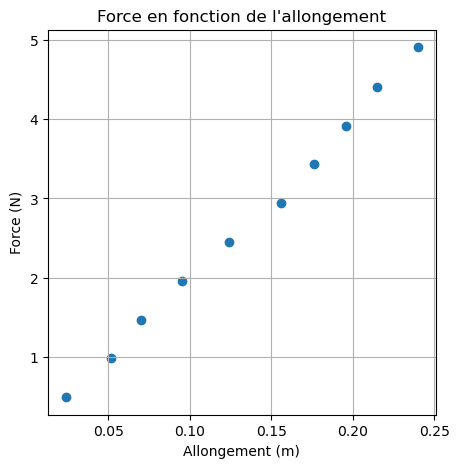

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("Allongement (m)")
plt.ylabel("Force (N)")
plt.grid()
plt.title("Force en fonction de l'allongement")
plt.scatter(Delta_l, F, label="Valeurs expérimentales")

On peut ajuster ces points sur une fonction qui prend comme variable l'allongement et qui a comme paramètre `k`. Pour cela, on définit une fonction dont le premier argument doit être la variable et les arguments suivants les paramètres qui seront à ajuster. Dans notre cas, la variable est l'allongement et le seul paramètre à ajuster est la raideur :

In [3]:
def loi_de_hooke(allongement, raideur):
    return raideur * allongement

Pour faire un ajustement, on utilisera la fonction `curve_fit` de la bibliothèse `scipy.optimize`.

In [4]:
#import de la fonction curve_fit depuis la bibliothèse scipy.optimize
from scipy.optimize import curve_fit

In [5]:
#
# La fonction curve_fit prend les arguments suivants :
#  * argument 1 : le nom de la fonction utilisée pour l'ajustement
#  * argument 2 : les valeurs expérimentales de la variable
#  * argument 3 : les valeurs expérimentales de la mesure
#  * argument 4 : une liste (nommée p0) des valeurs initiales des paramètres à optimisé
#
parametres_optimises, covariance = curve_fit(loi_de_hooke, Delta_l, F, p0=[2/0.1])
# On récupère 2 listes: les parametres optimisés et leurs covariance
k_optimise = parametres_optimises[0] # Les parametres optimises sont mis dans une liste, comme nous n'avons qu'un seul parametre
                                     # ce sera le premier élément de la liste
print(k_optimise, "N/m")

20.044017834369267 N/m


Une fois l'optimisation effectuée, on peut tracer la fonction avec les paramètres optimisés (dans notre cas, un seul paramètre) pour vérifier que l'ajustement s'est bien passé:

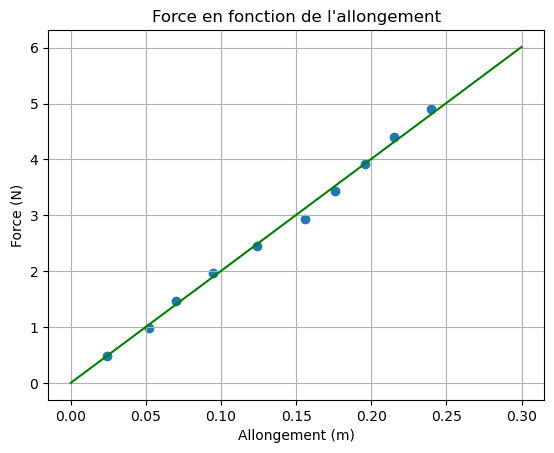

In [6]:
import numpy as np
x = np.linspace(0,0.30, 20)
y = loi_de_hooke(x, k_optimise)
plt.xlabel("Allongement (m)")
plt.ylabel("Force (N)")
plt.grid()
plt.title("Force en fonction de l'allongement")
plt.scatter(Delta_l, F, label="Valeurs expérimentales")
plt.plot(x,y, color="green")
plt.show()

# Ajustement à 4 paramètres
## Contexte expérimental : oscillateur harmonique amorti

On étudie le mouvement d’un oscillateur mécanique constitué d’une **masse suspendue à un ressort**.  
Lorsque la masse est écartée de sa position d’équilibre puis relâchée, elle oscille autour de cette position.  
En présence de frottements (résistance de l’air, dissipation interne du ressort, frottements au niveau du support),
l’amplitude des oscillations **décroît progressivement au cours du temps** : le système est alors dit *amorti*.

L’expérience consiste à :
1. Suspendre une masse à un ressort vertical.
2. Écarter la masse de sa position d’équilibre d’une distance connue.
3. Relâcher la masse sans vitesse initiale.
4. Mesurer la position de la masse en fonction du temps à l’aide d’un dispositif de mesure
   (pointage vidéo, capteur de position, règle graduée + chronomètre, smartphone).

Les mesures expérimentales de la position \(x(t)\) permettent d’ajuster les données sur le modèle
de l’**oscillateur harmonique amorti**, afin de déterminer les paramètres physiques du système :
- l’amplitude initiale,
- l’intensité de l’amortissement,
- la pulsation des oscillations,
- la phase initiale.

## Loi physique : oscillateur harmonique amorti

Le déplacement $x(t)$ d’une masse attachée à un ressort, en présence d’un amortissement (frottements), peut être modélisé par :

$
x(t)=x_0\,e^{-\gamma t}\cos\left(\omega t+\varphi\right)
$

### Signification des paramètres
- $x_0$ : amplitude initiale (en m)
- $\gamma$ : coefficient d’amortissement (en s\(^{-1}\))
- $\omega$ : pulsation (en rad·s\(^{-1}\))
- $\varphi$ : phase initiale (en rad)
- $t$ : temps (en s)

Cette loi traduit deux effets :
- une oscillation (le terme $\cos(\omega t+\varphi)$),
- une décroissance exponentielle de l’amplitude (le facteur $e^{-\gamma t}$).


### Valeurs expérimentales

| Temps \(t\) (s) | Position \(x\) (m) |
|----------------:|-------------------:|
| 0.00 | 0.0390 |
| 0.20 | 0.0139 |
| 0.40 | -0.0237 |
| 0.60 | -0.0328 |
| 0.80 | -0.0078 |
| 1.00 | 0.0214 |
| 1.20 | 0.0303 |
| 1.40 | 0.0080 |
| 1.60 | -0.0194 |
| 1.80 | -0.0273 |
| 2.00 | -0.0093 |
| 2.20 | 0.0172 |
| 2.40 | 0.0237 |
| 2.60 | 0.0084 |
| 2.80 | -0.0152 |
| 3.00 | -0.0201 |
| 3.20 | -0.0073 |
| 3.40 | 0.0133 |
| 3.60 | 0.0168 |
| 3.80 | 0.0060 |
| 4.00 | -0.0118 |


Paramètres ajustés :
  x0    =  0.03935247496316375 m
  gamma =  0.20609434771422927 s^-1
  omega =  5.236840177748798 rad/s
  phi   =  0.2040283405431307 rad


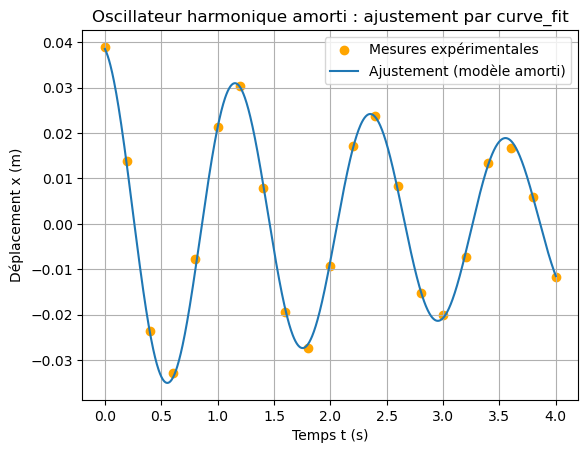

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------
# Données expérimentales
# -----------------------
t = [0.00, 0.20, 0.40, 0.60, 0.80, 1.00, 1.20, 1.40, 1.60, 1.80, 2.00, 2.20, 2.40, 2.60, 2.80, 3.00, 3.20, 3.40, 3.60, 3.80, 4.00]
x = [0.0390, 0.0139, -0.0237, -0.0328, -0.0078, 0.0214, 0.0303, 0.0080, -0.0194, -0.0273, -0.0093, 0.0172, 0.0237, 0.0084, -0.0152,
     -0.0201, -0.0073, 0.0133, 0.0168, 0.0060, -0.0118]

# -----------------------------------------
# Modèle physique : oscillation amortie (4 paramètres)
# -----------------------------------------
def x_oscillateur_amorti(t_s , x0_m, gamma_sinv, omega_rads, phi_rad):
    """
    x(t) = x0 * exp(-gamma * t) * cos(omega * t + phi)

    Paramètres:
      - x0_m        : amplitude initiale (m)
      - gamma_sinv  : amortissement (s^-1)
      - omega_rads  : pulsation amortie (rad/s)
      - phi_rad     : phase initiale (rad)
    """
    return x0_m * np.exp(-gamma_sinv * t_s) * np.cos(omega_rads * t_s + phi_rad)

# -----------------------
# Ajustement non linéaire
# -----------------------
# Guess initial "raisonnable" :
x0_initial = np.max(np.abs(x))
gamma_initial = 0.2
omega_initial = 2*np.pi*1.0  # ~1 Hz -> omega ~ 6.28 rad/s
phi_initial = 0.0

popt, pcov = curve_fit(x_oscillateur_amorti, t, x, p0=[x0_initial, gamma_initial, omega_initial, phi_initial])

x0_opt = popt[0]
gamma_opt = popt[1]
omega_opt = popt[2]
phi_opt = popt[3]

print("Paramètres ajustés :")
print("  x0    = ", x0_opt, "m")
print("  gamma = ", gamma_opt, "s^-1")
print("  omega = ", omega_opt, "rad/s")
print("  phi   = ", phi_opt, "rad")

# -----------------------
# Visualisation
# -----------------------
t_fine = np.linspace(0, 4, 1000)
x_fit_curve = x_oscillateur_amorti(t_fine, x0_opt, gamma_opt, omega_opt, phi_opt)

plt.figure()
plt.scatter(t, x, color="orange", label="Mesures expérimentales")
plt.plot(t_fine, x_fit_curve, label="Ajustement (modèle amorti)")
plt.xlabel("Temps t (s)")
plt.ylabel("Déplacement x (m)")
plt.title("Oscillateur harmonique amorti : ajustement par curve_fit")
plt.legend()
plt.grid(True)
plt.show()
